In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cp
import math
import datetime as dt
from matplotlib import rc
import matplotlib.gridspec as gridspec
from dateutil.relativedelta import relativedelta
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data_length = 365*3 #(3 years worth of data)
kgs_in_quintal = 100

In [ ]:
### Load the test (raw) data
price_path = '/content/drive/MyDrive/results/paper/%s_%s.npy'
#on = cp.load(open(base_path+'Onion_testprice_2013-14-15.list','rb'))
#pot = cp.load(open(base_path+'Potato_testprice_2013-14-15.list','rb'))
#wh = cp.load(open(base_path+'Wheat_testprice_2013-14-15.list','rb'))
#rice = cp.load(open(base_path+'Rice_testprice_2013-14-15.list','rb'))
on = np.load(price_path%('Onion','true'))[:data_length]/kgs_in_quintal
rice = np.load(price_path%('Rice','true'))[:data_length]/kgs_in_quintal
wh = np.load(price_path%('Wheat','true'))[:data_length]/kgs_in_quintal
pot = np.load(price_path%('Potato','true'))[:data_length]/kgs_in_quintal

FileNotFoundError: ignored

In [ ]:
len(on)

2922

In [ ]:
### Load the events
event_path = '/content/drive/MyDrive/Colab Notebooks/'
rice_events = cp.load(open(event_path+'rice_events.list','rb'))
wheat_events = cp.load(open(event_path+'wheat_events.list','rb'))
on_events = cp.load(open(event_path+'on_events.list','rb'))
pot_events = cp.load(open(event_path+'pot_events.list','rb'))
pot_events = np.array(pot_events)
pot_events[np.where(pot_events == 'SLASH')[0]] = 'CUT'

In [11]:
#dates  = [dt.datetime.strptime(k[0], '%Y-%m-%d').date().strftime('%d-%b-%Y') for k in on]
#xtickdates = []
#for i,dat in enumerate(dates):
#    if i%3==0:
#        xtickdates.append(dat[3:].replace('-20','-'))
#    else:
#        xtickdates.append(' ')

start = dt.datetime(2013,1,1)
xdates = [str(start.date())]
tmp = start.date()
num_years = 3
num_labels=num_years*12
for i in range(num_years*4):
    tmp += relativedelta(months=num_years)
    xdates.append( str(tmp))
event_xdates = [str(start.date())]
tmp = start.date()
dates = ['01/13']
for i in range(num_labels):
    tmp += relativedelta(months=1)
    event_xdates.append( str(tmp))
    if (i+1)%3==0:
      dates.append(tmp.strftime('%m/%y'))
    else:
      dates.append(' ')

#### Converting x-tick labels into yy-mmm format
#dates = [dt.datetime.strptime(k, '%Y-%m-%d').date().strftime('%d-%b-%y') for k in xdates]
#### Generating all dates
xxdates = []
for i in range(data_length):
    xxdates.append(str(start.date()+dt.timedelta(i)))

### Most important event during each month

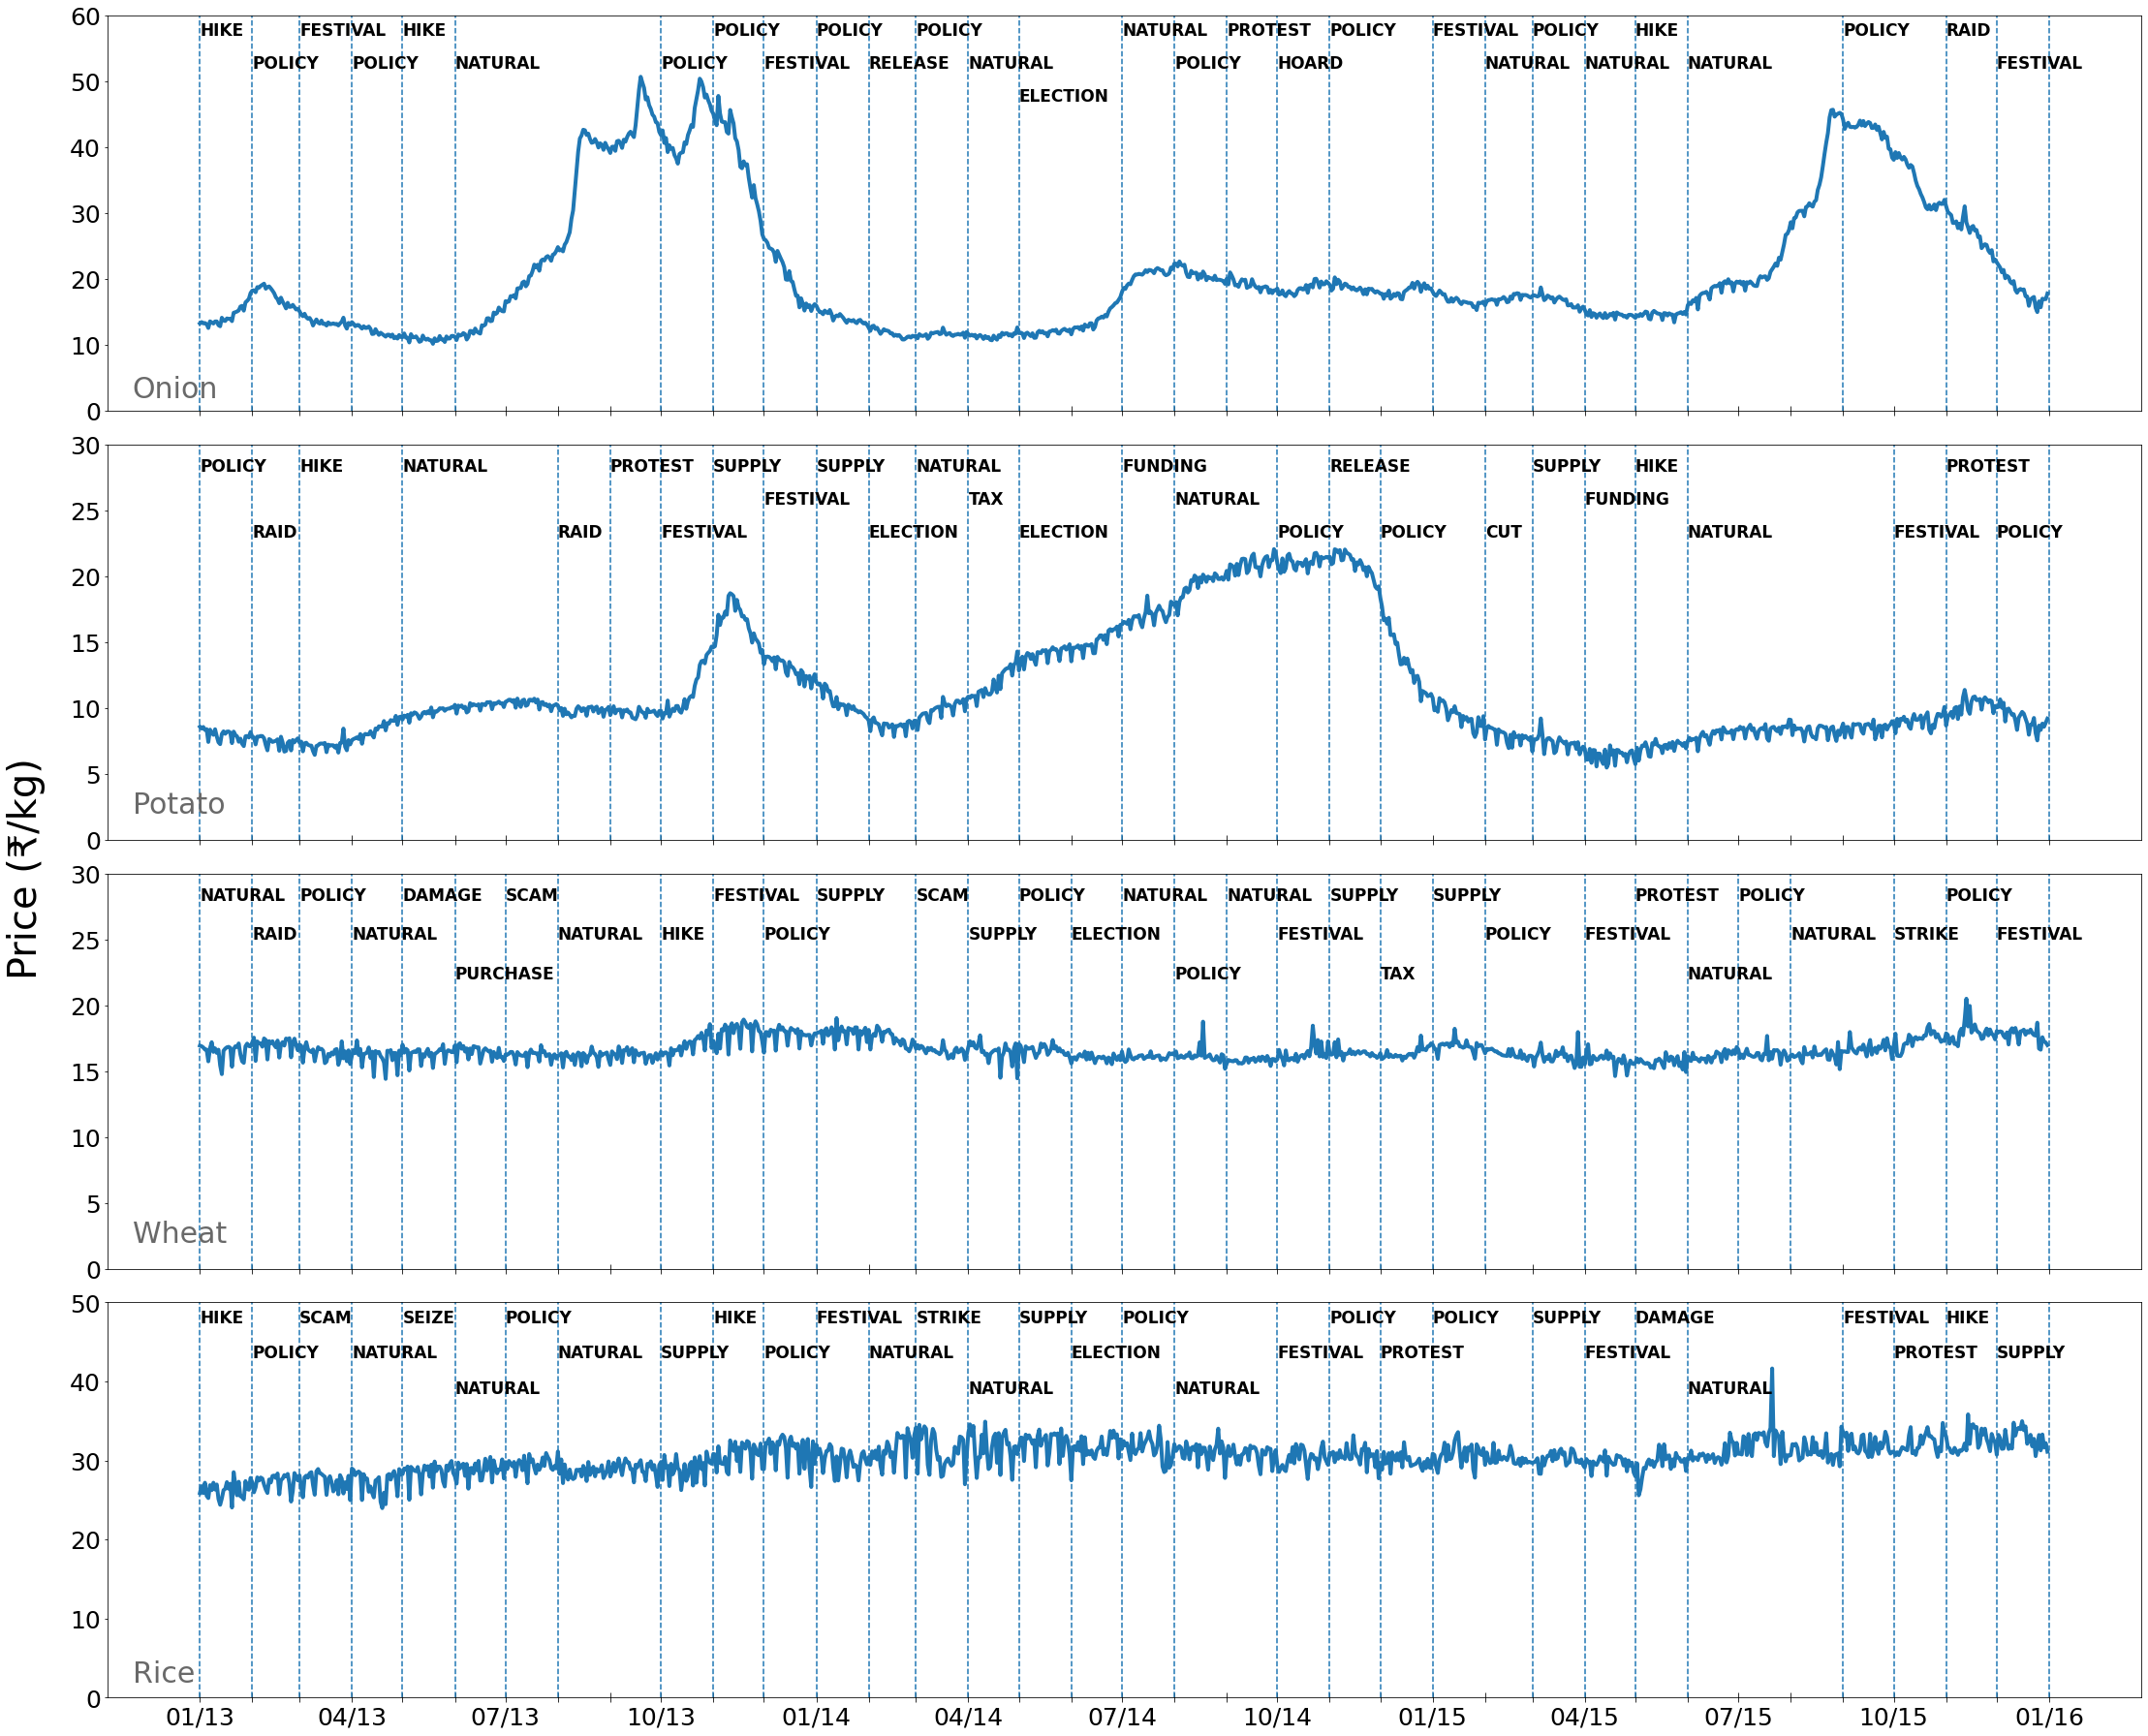

In [ ]:
## Preliminaries
ytick_fontsize=25
event_fontsize=17
### Height of the event labels
on_txt_line = [5700/kgs_in_quintal]*num_labels
pot_txtline = [2800/kgs_in_quintal]*num_labels
wh_txtline = [2800/kgs_in_quintal]*num_labels
rice_txtline = [4750/kgs_in_quintal]*num_labels
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

fig = plt.figure(figsize=(30, 25))
gs1 = gridspec.GridSpec(4, 1)
gs1.update(wspace=0.04, hspace=0.25) # set the spacing between axes.

ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1])
ax3 = plt.subplot(gs1[2])
ax4 = plt.subplot(gs1[3])

## Onion
on_max = 6000/kgs_in_quintal
ax1.plot(xxdates,on,linewidth=4)
#plt.ylabel(' ', fontsize = 25)#,fontweight='bold')
#ax1.set_title('Onion (Rs/quintal)',fontsize=27)
#ax1.set_xticklabels(xtickdates,fontsize=25,rotation=0)#,fontweight='bold' #np.arange(len(dates)),
ax1.set_xticklabels([])
#ax1.set_yticklabels(np.arange(0,5500,1000),fontsize=25)#,fontweight='bold')
ax1.set_ylim(0,on_max)

#ax1.bar(on_starts, 6000, on_bwidth,alpha=0.5,bottom=[0 for m in range(len(on_starts))], color=on_color,linewidth=4,fill=True)

### Local corrections
# txt_line[11] = 5000
# txt_line[18] = 5000
# txt_line[20] = 5000
# txt_line[22] = 5000

on_omit = [6,7,8,17,23,30,31,33]
on_thresh = 500/kgs_in_quintal
event_xpos = 0
for i in range(num_labels):
    if i > 0:
      event_xpos += days_in_month[(i-1)%12]
    if i not in on_omit:
        if i%2==0:
            thrs=0
        else:
            thrs = on_thresh
        if i==16:
            thrs = on_thresh*2
        ax1.vlines(event_xpos, 0, on_max, colors=None, linestyles='--')
        ax1.text(event_xpos,on_txt_line[i]-thrs,on_events[i],fontsize=event_fontsize,fontweight='bold',color=(0,0,0),rotation=0)#(.4,.4,.4))

ax1.vlines(event_xpos+31, 0, on_max, colors=None, linestyles='--')
#for i in range(num_labels):
#    if i not in on_omit:


## Potato
pot_max = 3000/kgs_in_quintal
ax2.plot(xxdates,pot,linewidth=4)
#ax2.ylabel('Price(Rs/quintal)', fontsize = 25,fontweight='bold')
#ax2.set_title('Potato (Rs/quintal)',fontsize=27)
#ax2.set_xticklabels(xtickdates,fontsize=25,rotation=0)
ax2.set_xticklabels([])
#ax2.set_yticklabels(np.arange(0,2500,500),fontsize=25)#,fontweight='bold')
ax2.set_ylim(0,pot_max)
#ax2.bar(pot_starts, 2500, pot_bwidth,alpha=0.5, color=on_color,linewidth=4,fill=True)
# pot_txtline[8] = 2320
# pot_txtline[14] = 2320
# pot_txtline[28] = 2320
# pot_txtline[21] = 2320
# pot_txtline[34] = 2320

pot_omit = [3,5,6,17,20,24,30,31,32]
pot_thresh = 500/kgs_in_quintal

event_xpos = 0
for i in range(num_labels):
#     if pot_events[i] == 'del' or pot_events[i] == 'tau' or pot_events[i] == 'DEL' or pot_events[i] == 'TAU':
#         continue
    #delta = -.1
    if i > 0:
      event_xpos += days_in_month[(i-1)%12]
    if i not in pot_omit:
        if i%2==0:
            thrs=0
        else:
            thrs = pot_thresh
        if i in [11,15,19,27]:
            thrs = pot_thresh/2
        elif i in [16]:
            thrs = pot_thresh
        ax2.vlines(event_xpos, 0, pot_max, colors=None, linestyles='--')
        ax2.text(event_xpos,pot_txtline[i]-thrs, pot_events[i],fontsize =event_fontsize,fontweight='bold',rotation=0)

ax2.vlines(event_xpos+31, 0, pot_max, colors=None, linestyles='--')
#for i in range(36):
#    if i not in pot_omit:
#        ax2.vlines(i, 0, pot_max, colors=None, linestyles='--')

# ax1.grid(color='k', linewidth=.5, linestyle=':', axis='x')
# ax2.grid(color='k', linewidth=.5, linestyle=':', axis='x')

ax1.tick_params(axis='x',length=10,direction='inout')#,pad=15)
ax2.tick_params(axis='x',length=10,direction='inout')

## Wheat
wh_max = 3000/kgs_in_quintal
ax3.plot(xxdates,wh,linewidth=4)
#ax2.ylabel('Price(Rs/quintal)', fontsize = 25,fontweight='bold')
#ax3.set_title('Wheat (Rs/quintal)',fontsize=27)
ax3.set_xticklabels([])
# ax3.set_xticklabels(xtickdates,fontsize=25,rotation=0)
ax3.set_yticks(np.arange(0,wh_max+1,5))
#fontsize=ytick_fontsize)#,fontweight='bold')
ax3.set_ylim(0,wh_max)

wh_omit = [8,13,26,32]
wh_thresh = 300/kgs_in_quintal
event_xpos = 0
for i in range(num_labels):
    if i > 0:
      event_xpos += days_in_month[(i-1)%12]
    if i not in wh_omit:
        if i%2==0:
            thrs=0
        else:
            thrs = wh_thresh
        if i in [5,19,23,29]:
            thrs+= wh_thresh
        ax3.vlines(event_xpos, 0, wh_max, colors=None, linestyles='--')
        ax3.text(event_xpos,wh_txtline[i]-thrs,wheat_events[i],fontsize = event_fontsize,fontweight='bold',rotation=0)

ax3.vlines(event_xpos+31, 0, wh_max, colors=None, linestyles='--')

#for i in range(36):
#    if i not in wh_omit:
#        ax3.vlines(i, 0, wh_max, colors=None, linestyles='--')


## Rice
rice_max = 5000/kgs_in_quintal
ax4.plot(xxdates,rice,linewidth=4)
#ax2.ylabel('Price(Rs/quintal)', fontsize = 25,fontweight='bold')
#ax4.set_title('Rice (Rs/quintal)',fontsize=27)
ax1.set(xticks=event_xdates)
ax2.set(xticks=event_xdates)
ax3.set(xticks=event_xdates)
ax4.set(xticks=event_xdates)
ax4.set_xticklabels(dates,fontsize=25,rotation=0)
ax4.set_yticks(np.arange(0,rice_max+1,10))#,fontweight='bold')
ax4.set_ylim(0,rice_max)



# ax4.set_yticklabels(np.arange(2400,3800,200),fontsize=25)#,fontweight='bold')
# ax4.set_ylim(2500,3500)

rice_omit = [8,20,25,30,31]
rice_thresh = 450/kgs_in_quintal
event_xpos = 0
for i in range(num_labels):
    if i > 0:
      event_xpos += days_in_month[(i-1)%12]
    if i not in rice_omit:
        if i%2==0:
            thrs=0
        else:
            thrs = rice_thresh
        if i in [5,15,19,29]:
            thrs += rice_thresh
        ax4.vlines(event_xpos, 0, rice_max, colors=None, linestyles='--')
        ax4.text(event_xpos,rice_txtline[i]-thrs,rice_events[i],fontsize = event_fontsize,fontweight='bold',rotation=0)

ax4.vlines(event_xpos+31, 0, rice_max, colors=None, linestyles='--')

#for i in range(36):
#    if i not in rice_omit:
#        ax4.vlines(i, 0, rice_max, colors=None, linestyles='--')

ax3.tick_params(axis='x',length=10,direction='inout')#,pad=15)
ax4.tick_params(axis='x',length=10,direction='inout')
ax4.tick_params(axis='y', labelsize=ytick_fontsize)
ax3.tick_params(axis='y', labelsize=ytick_fontsize)
ax2.tick_params(axis='y', labelsize=ytick_fontsize)
ax1.tick_params(axis='y', labelsize=ytick_fontsize)
fig.text(-0.025,0.5,'Price (\u20B9/kg)',va='center',fontsize=40,rotation='vertical')
crop_name_xpos = -40
crop_name_ypos = 2
crop_color = 'dimgrey'
ax4.text(crop_name_xpos,crop_name_ypos,'Rice',fontsize = 30, color=crop_color)
ax3.text(crop_name_xpos,crop_name_ypos,'Wheat',fontsize = 30, color=crop_color)
ax2.text(crop_name_xpos,crop_name_ypos,'Potato',fontsize = 30, color=crop_color)
ax1.text(crop_name_xpos,crop_name_ypos,'Onion',fontsize = 30, color=crop_color)

gs1.tight_layout(fig)
plt.savefig('fig4.pdf')
plt.savefig('fig4.png')

In [ ]:
max(pot)

22.0479710145

In [ ]:
xdates

['2012-12-31',
 '2013-03-31',
 '2013-06-30',
 '2013-09-30',
 '2013-12-30',
 '2014-03-30',
 '2014-06-30',
 '2014-09-30',
 '2014-12-30',
 '2015-03-30',
 '2015-06-30',
 '2015-09-30',
 '2015-12-30']

### Show importance of events as a heatmap



In [3]:
cbar_fontsize=16
cbar_padding = 0.01

In [4]:
def convert_to_binary(raw_vals, raw):
  score_matrix = np.array(raw_vals)
  if raw:
    return MinMaxScaler().fit_transform(score_matrix)
  top_event_ids = np.argmax(score_matrix, 0)
  binary_matrix = np.zeros_like(score_matrix)
  binary_matrix[top_event_ids, range(binary_matrix.shape[1])] = 1
  return binary_matrix

In [5]:
# taken from maplotlib official docs
def heatmap(data, row_labels, col_labels, ax=None, set_xticks=True, raw=True,
            cbar_kw={'format': '%.1f'}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, aspect='auto', vmin=0, vmax=1, **kwargs)

    # Create colorbar
    if raw:
      cbar = ax.figure.colorbar(im, ax=ax, pad=cbar_padding, **cbar_kw)
      cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=cbar_fontsize)
    else:
      cbar=None

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    if col_labels:
      ax.set_xticklabels(col_labels, fontsize=14)
      # Rotate the tick labels and set their alignment.
      plt.setp(ax.get_xticklabels(), rotation=0,rotation_mode="anchor")
    ax.set_yticklabels(row_labels, fontsize=12)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Turn spines off and create white grid.
    if raw:
      [s.set_visible(False) for s in ax.spines.values()]

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    if raw:
      ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    else:
      ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', length=0.5)
    if not set_xticks:
          ax.tick_params(axis='x', length=0)
          ax.set_xticklabels([])

    return im, cbar

In [6]:
event_scores_path = '/content/drive/MyDrive/news-based-forecasting/'
# crop_importance_vals = cp.load(open(event_path+'crop_event.dict', 'rb'))
crop_importance_vals = cp.load(open(event_scores_path+'event_importance_scores_shap.dict', 'rb'))
on_importance = crop_importance_vals['Onion']
pot_importance = crop_importance_vals['Potato']
wh_importance = crop_importance_vals['Wheat']
rice_importance = crop_importance_vals['Rice']
#np.setdiff1d(pot_events, np.array(pot_importance.keys()))
#np.unique(pot_events), pot_importance.keys()

In [7]:
importance = rice_importance
[len(importance[event]) for event in importance]

[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]

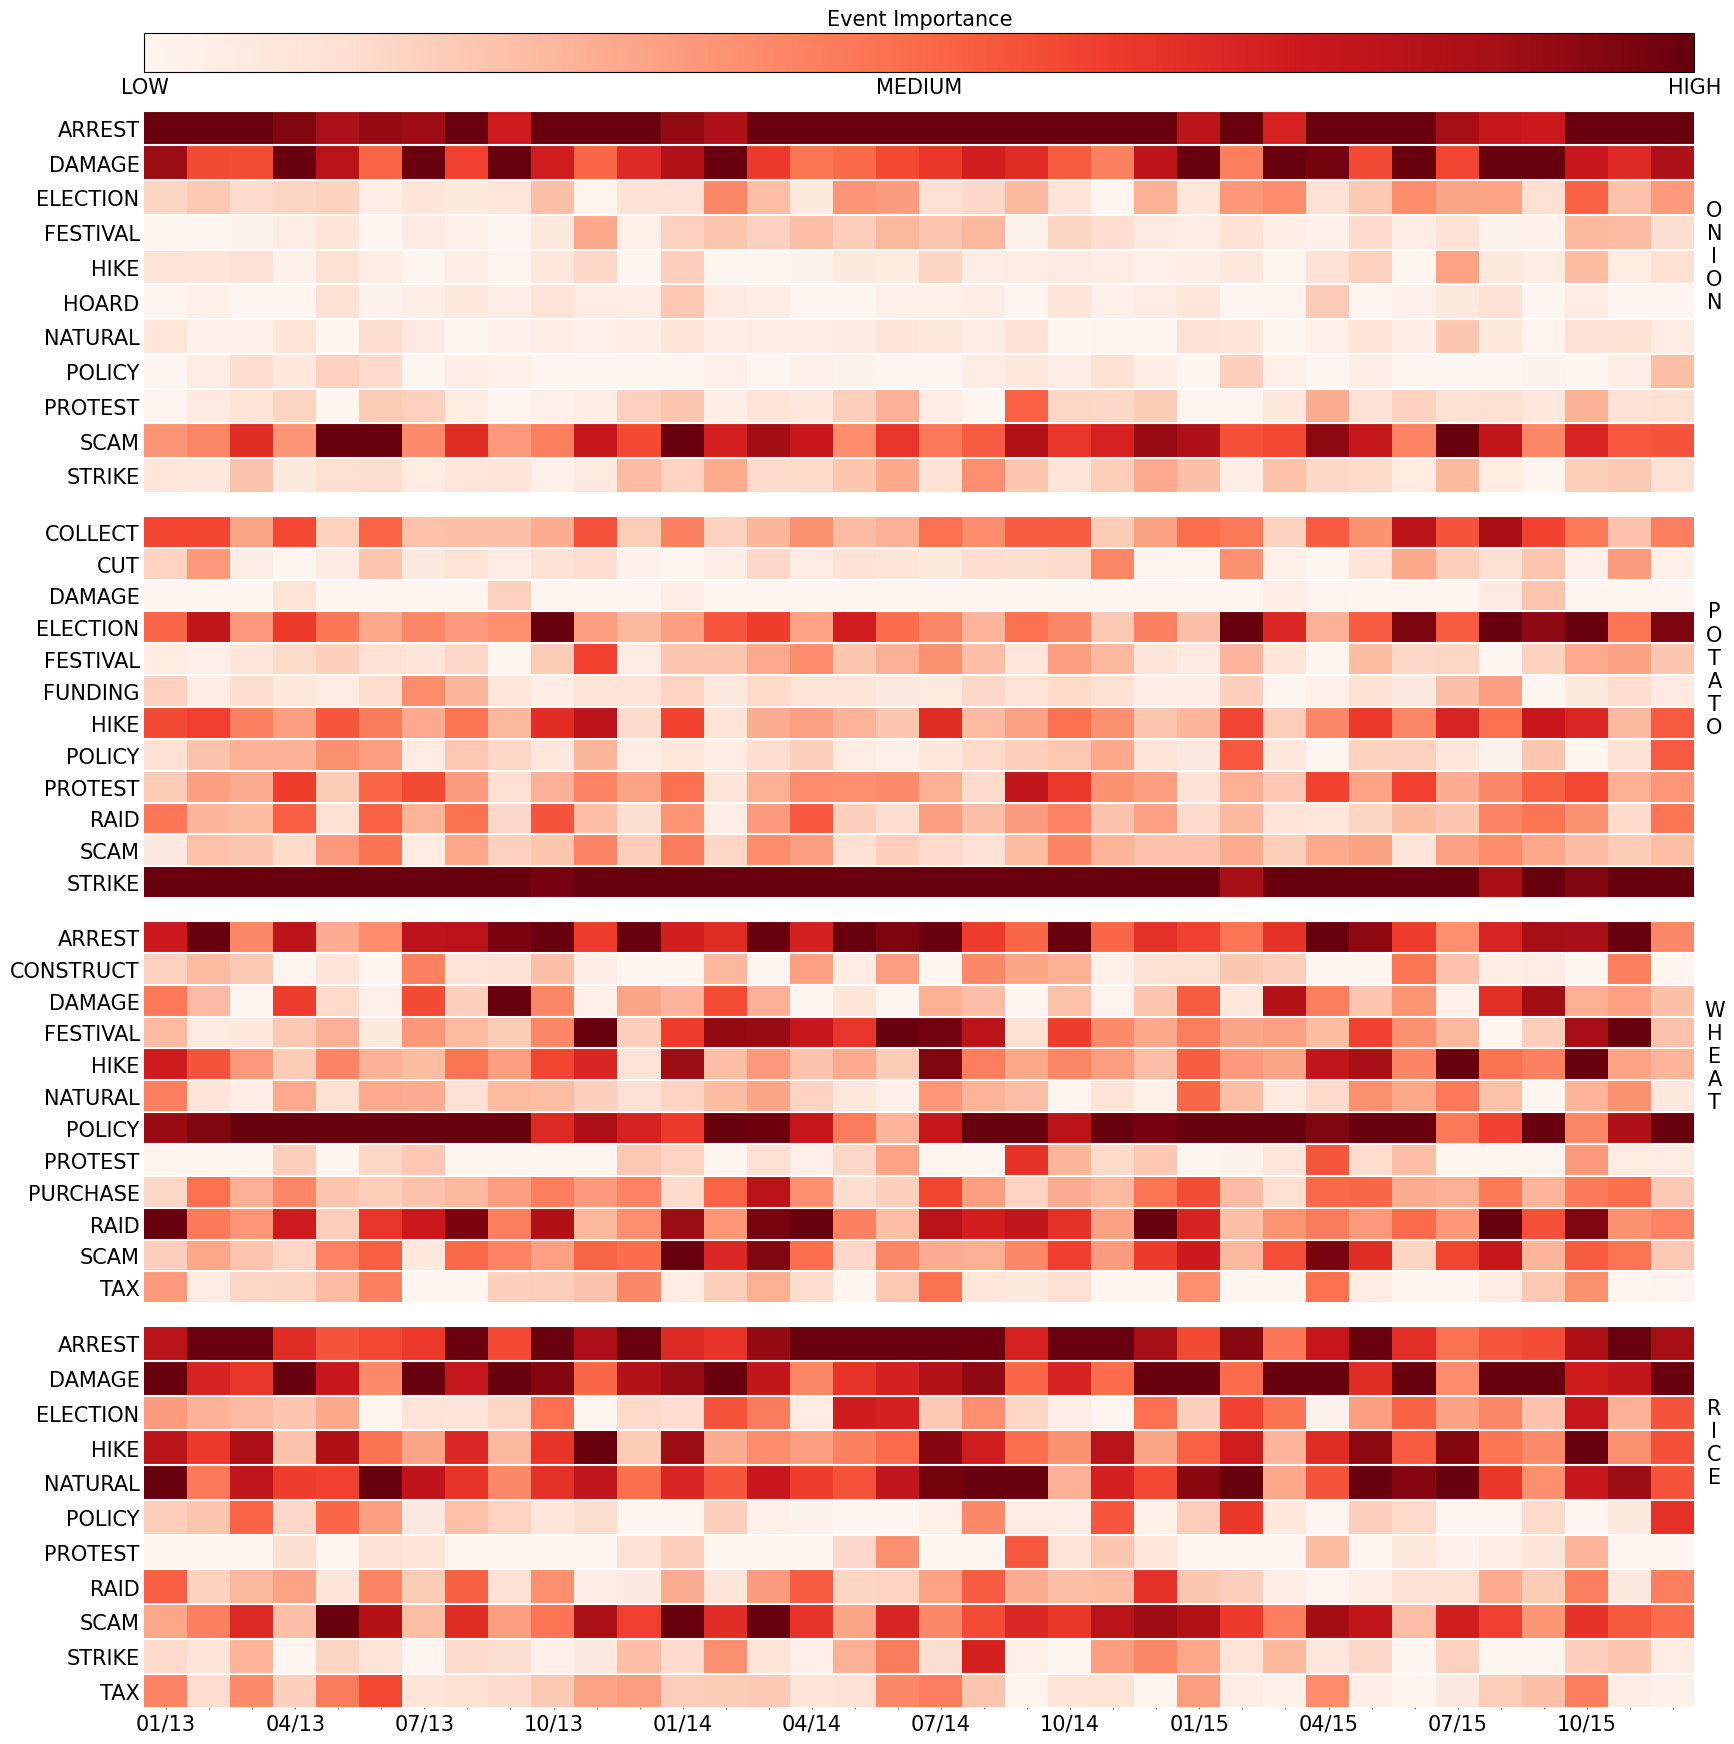

In [12]:
def newline_join(input_str):
  return '\n'.join(input_str)
## plot heatmaps
# read in the importance values
raw = True
ytick_fontsize = 15
title_fontsize=15
clabel_fontsize=25
event_linewidth=1.5
cmap_color='binary' if not raw else 'Reds'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 25))
fig.subplots_adjust(hspace=0.06)
#gs1.update(wspace=0.04, hspace=0.25)
# set the spacing between axes.

# prepare the importance data as a 2D array
# onion
row_labels = []
vals_to_plot = []
importance_vals = on_importance
event_list = sorted(importance_vals.keys())
ax=ax1
for event in event_list:
  if event not in row_labels:
    row_labels.append(event.strip())
    vals_to_plot.append(importance_vals[event])
data = convert_to_binary(vals_to_plot, raw)
ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
[s.set_visible(False) for s in ax.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

# potato
row_labels = []
vals_to_plot = []
importance_vals = pot_importance
event_list = sorted(importance_vals.keys())
#event_list = sorted(pot_events)
ax=ax2
for event in event_list:
  if event not in row_labels:
    row_labels.append(event)
    vals_to_plot.append(importance_vals[event])
data = convert_to_binary(vals_to_plot, raw)
ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
[s.set_visible(False) for s in ax.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)
# wheat
row_labels = []
vals_to_plot = []
importance_vals = wh_importance
ax=ax3
event_list = sorted(importance_vals.keys())
#event_list = sorted(wheat_events)
for event in event_list:
  if event not in row_labels:
    row_labels.append(event)
    vals_to_plot.append(importance_vals[event])

data = convert_to_binary(vals_to_plot, raw)
ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
[s.set_visible(False) for s in ax3.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)


# rice
row_labels = []
vals_to_plot = []
importance_vals = rice_importance
event_list = sorted(importance_vals.keys())
#event_list = sorted(rice_events)
ax=ax4
for event in event_list:
  if event not in row_labels:
    row_labels.append(event)
    vals_to_plot.append(importance_vals[event])

data = convert_to_binary(vals_to_plot, raw)
im = ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
ax.yaxis.set_label_position('right')
[s.set_visible(False) for s in ax.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0.5)
ax.set_xticklabels(dates[:-1], fontsize=ytick_fontsize)
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

cbar = fig.colorbar(im, ax=[ax1, ax2, ax3, ax4], aspect=40, pad=0.02, location='top')
cbar.ax.set_xlabel('Event Importance', fontsize=title_fontsize, labelpad=6.0)
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.set_ticks(np.arange(0, 1.1, 0.5))
cbar.set_ticklabels(['LOW', 'MEDIUM', 'HIGH'])
cbar.ax.tick_params(labelsize=ytick_fontsize, length=0)
fig.text(0.91, 0.67, newline_join('ONION'), fontsize=title_fontsize, rotation=0, ha='center')
fig.text(0.91, 0.50, newline_join('POTATO'), fontsize=title_fontsize, rotation=0, ha='center')
fig.text(0.91, 0.35, newline_join('WHEAT'), fontsize=title_fontsize, rotation=0, ha='center')
fig.text(0.91, 0.20, newline_join('RICE'), fontsize=title_fontsize, rotation=0, ha='center')
#fig.text(0.83, 0.57, 'Event importance', fontsize=clabel_fontsize, rotation=90)
plt.savefig('fig4.pdf')

In [ ]:
data[2]

array([0.82794407, 0.83294429, 0.8246002 , 0.81007108, 0.81691465,
       0.82509535, 0.83287965, 0.82977983, 0.84055705, 0.81876791,
       0.80490068, 0.80805245, 0.78597066, 0.82951571, 0.78062432,
       0.79045368, 0.81668086, 0.81726011, 0.82169306, 0.84054545,
       0.81719056, 0.82256114, 0.83428809, 0.81266157, 0.82685154,
       0.82689603, 0.83672551, 0.82896358, 0.83084665, 0.82102124,
       0.8170846 , 0.82957793, 0.83725194, 0.83082376, 0.83514258,
       0.83496533])

In [ ]:
importance = wh_importance
for event in importance: print(event, np.max(importance[event]))

 purchase 0.05734784745108036
 festival 0.0505760554374466
 hike 0.010483547249966632
 raid 0.04213117160871925
 natural 0.017656916823808946
 scam 0.04008825223577479
 strike 0.08768385596528289


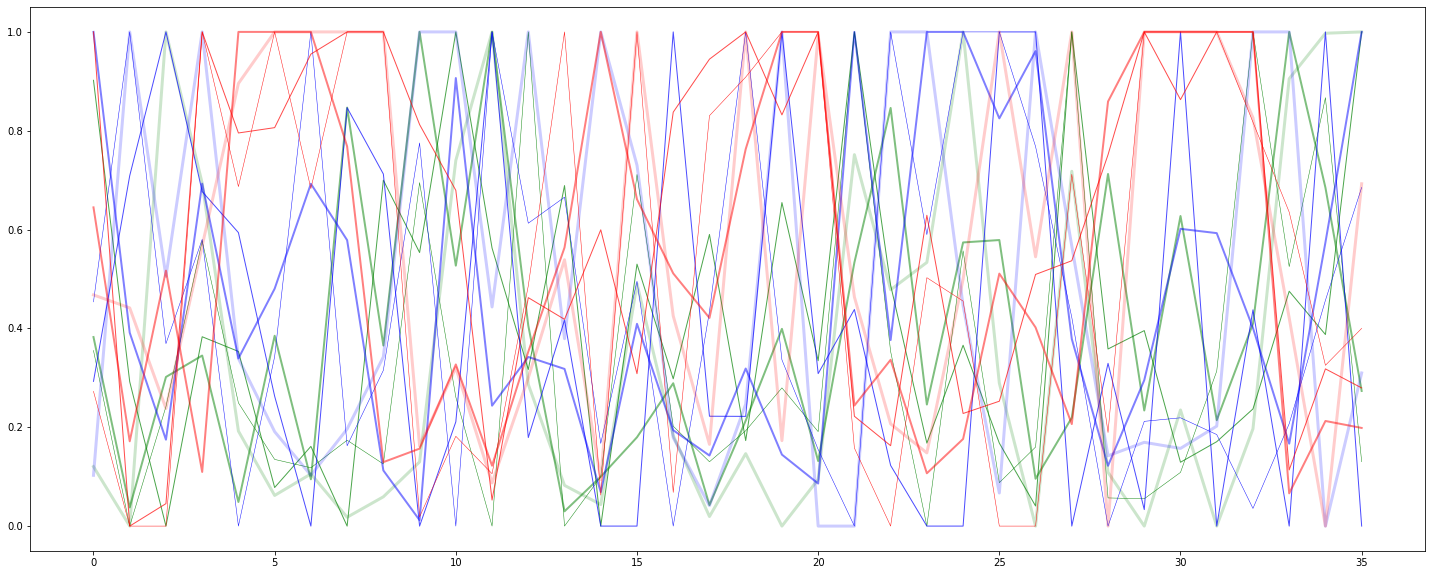

In [ ]:
common_events = ['FESTIVAL', 'POLICY', 'NATURAL']
# markers = ['s', '^', '.', 'd']
markers = ['g', 'b', 'r', 'orange']
fig, ax = plt.subplots(figsize=(25, 10))
for event_id, event in enumerate(common_events):
  ax.plot(on_importance[event], color=markers[event_id], linewidth=3, alpha=0.2)
  ax.plot(pot_importance[event], color=markers[event_id], linewidth=2, alpha=0.5)
  ax.plot(wh_importance[event], color=markers[event_id], linewidth=1, alpha=0.7)
  ax.plot(rice_importance[event], color=markers[event_id], linewidth=0.5, alpha=0.9)

In [ ]:
dates

['01/13',
 ' ',
 ' ',
 '04/13',
 ' ',
 ' ',
 '07/13',
 ' ',
 ' ',
 '10/13',
 ' ',
 ' ',
 '01/14',
 ' ',
 ' ',
 '04/14',
 ' ',
 ' ',
 '07/14',
 ' ',
 ' ',
 '10/14',
 ' ',
 ' ',
 '01/15',
 ' ',
 ' ',
 '04/15',
 ' ',
 ' ',
 '07/15',
 ' ',
 ' ',
 '10/15',
 ' ',
 ' ',
 '01/16']